In [1]:
import tensorflow as tf
import numpy as np

2024-04-25 11:32:34.348758: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 11:32:34.348811: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 11:32:34.350635: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 11:32:34.498917: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
DOWNLOAD_ROOT = "http://download.tensorflow.org/data/"
FILENAME = "quickdraw_tutorial_dataset_v1.tar.gz"
filepath = tf.keras.utils.get_file(FILENAME,
                                DOWNLOAD_ROOT + FILENAME,
                                cache_subdir="datasets/quickdraw",
                                extract=True)

In [3]:
from pathlib import Path

In [4]:
data_file_paths = Path(filepath).parent

In [5]:
import os

In [6]:
os.listdir(data_file_paths)

['eval.tfrecord-00000-of-00010',
 'eval.tfrecord-00007-of-00010',
 'training.tfrecord-00000-of-00010',
 'training.tfrecord-00001-of-00010',
 'training.tfrecord-00007-of-00010',
 'eval.tfrecord-00002-of-00010',
 'quickdraw_tutorial_dataset_v1.tar.gz',
 'eval.tfrecord-00009-of-00010',
 'eval.tfrecord-00006-of-00010',
 'eval.tfrecord.classes',
 'eval.tfrecord-00008-of-00010',
 'training.tfrecord-00009-of-00010',
 'training.tfrecord.classes',
 'training.tfrecord-00004-of-00010',
 'eval.tfrecord-00004-of-00010',
 'training.tfrecord-00003-of-00010',
 'training.tfrecord-00005-of-00010',
 'training.tfrecord-00002-of-00010',
 'eval.tfrecord-00005-of-00010',
 'training.tfrecord-00008-of-00010',
 'eval.tfrecord-00003-of-00010',
 'training.tfrecord-00006-of-00010',
 'eval.tfrecord-00001-of-00010']

In [7]:
train_data_paths = sorted([str(path) for path in data_file_paths.glob("training.tfrecord-*")])
train_data_paths

['/home/edi/.keras/datasets/quickdraw/training.tfrecord-00000-of-00010',
 '/home/edi/.keras/datasets/quickdraw/training.tfrecord-00001-of-00010',
 '/home/edi/.keras/datasets/quickdraw/training.tfrecord-00002-of-00010',
 '/home/edi/.keras/datasets/quickdraw/training.tfrecord-00003-of-00010',
 '/home/edi/.keras/datasets/quickdraw/training.tfrecord-00004-of-00010',
 '/home/edi/.keras/datasets/quickdraw/training.tfrecord-00005-of-00010',
 '/home/edi/.keras/datasets/quickdraw/training.tfrecord-00006-of-00010',
 '/home/edi/.keras/datasets/quickdraw/training.tfrecord-00007-of-00010',
 '/home/edi/.keras/datasets/quickdraw/training.tfrecord-00008-of-00010',
 '/home/edi/.keras/datasets/quickdraw/training.tfrecord-00009-of-00010']

In [8]:
eval_data_paths = sorted([str(path) for path in data_file_paths.glob("eval.tfrecord-*")])
eval_data_paths

['/home/edi/.keras/datasets/quickdraw/eval.tfrecord-00000-of-00010',
 '/home/edi/.keras/datasets/quickdraw/eval.tfrecord-00001-of-00010',
 '/home/edi/.keras/datasets/quickdraw/eval.tfrecord-00002-of-00010',
 '/home/edi/.keras/datasets/quickdraw/eval.tfrecord-00003-of-00010',
 '/home/edi/.keras/datasets/quickdraw/eval.tfrecord-00004-of-00010',
 '/home/edi/.keras/datasets/quickdraw/eval.tfrecord-00005-of-00010',
 '/home/edi/.keras/datasets/quickdraw/eval.tfrecord-00006-of-00010',
 '/home/edi/.keras/datasets/quickdraw/eval.tfrecord-00007-of-00010',
 '/home/edi/.keras/datasets/quickdraw/eval.tfrecord-00008-of-00010',
 '/home/edi/.keras/datasets/quickdraw/eval.tfrecord-00009-of-00010']

In [9]:
with open(os.path.join(data_file_paths, "training.tfrecord.classes")) as fd:
    train_classes = fd.readlines()
with open(os.path.join(data_file_paths, "eval.tfrecord.classes")) as fd:
    eval_classes = fd.readlines()

In [10]:
train_classes[:3]

['garden hose\n', 'lighter\n', 'penguin\n']

In [11]:
train_classes = list(map(lambda name: str(name).lower().strip(), train_classes))
train_classes

['garden hose',
 'lighter',
 'penguin',
 'tractor',
 'sheep',
 'skateboard',
 'mountain',
 'mouse',
 'chandelier',
 'guitar',
 'roller coaster',
 'owl',
 'toilet',
 'map',
 'snail',
 'yoga',
 'spoon',
 'camera',
 'telephone',
 'bench',
 'pig',
 'lion',
 'skull',
 'hand',
 'raccoon',
 'beard',
 'church',
 'animal migration',
 'whale',
 'sun',
 'washing machine',
 'airplane',
 'megaphone',
 'sleeping bag',
 'jail',
 'fire hydrant',
 'car',
 'barn',
 'swing set',
 'rake',
 'paintbrush',
 'van',
 'dragon',
 'sailboat',
 'compass',
 'duck',
 'hat',
 'kangaroo',
 'donut',
 'crocodile',
 'coffee cup',
 'cooler',
 'waterslide',
 'feather',
 'firetruck',
 'stereo',
 'leg',
 'tree',
 'pillow',
 'purse',
 'hourglass',
 'ear',
 'broccoli',
 'goatee',
 'moon',
 'bridge',
 'peas',
 'squiggle',
 'foot',
 'camouflage',
 'string bean',
 'pants',
 'lipstick',
 'jacket',
 'hockey puck',
 'truck',
 'table',
 'hammer',
 'the great wall of china',
 'paint can',
 'fireplace',
 'leaf',
 'apple',
 'beach',
 'w

In [12]:
eval_classes = list(map(lambda name: str(name).lower().strip(), eval_classes))
eval_classes

['garden hose',
 'lighter',
 'penguin',
 'tractor',
 'sheep',
 'skateboard',
 'mountain',
 'mouse',
 'chandelier',
 'guitar',
 'roller coaster',
 'owl',
 'toilet',
 'map',
 'snail',
 'yoga',
 'spoon',
 'camera',
 'telephone',
 'bench',
 'pig',
 'lion',
 'skull',
 'hand',
 'raccoon',
 'beard',
 'church',
 'animal migration',
 'whale',
 'sun',
 'washing machine',
 'airplane',
 'megaphone',
 'sleeping bag',
 'jail',
 'fire hydrant',
 'car',
 'barn',
 'swing set',
 'rake',
 'paintbrush',
 'van',
 'dragon',
 'sailboat',
 'compass',
 'duck',
 'hat',
 'kangaroo',
 'donut',
 'crocodile',
 'coffee cup',
 'cooler',
 'waterslide',
 'feather',
 'firetruck',
 'stereo',
 'leg',
 'tree',
 'pillow',
 'purse',
 'hourglass',
 'ear',
 'broccoli',
 'goatee',
 'moon',
 'bridge',
 'peas',
 'squiggle',
 'foot',
 'camouflage',
 'string bean',
 'pants',
 'lipstick',
 'jacket',
 'hockey puck',
 'truck',
 'table',
 'hammer',
 'the great wall of china',
 'paint can',
 'fireplace',
 'leaf',
 'apple',
 'beach',
 'w

In [13]:
assert train_classes == eval_classes, "No match between train and eval classes"

In [14]:
print("Number of available classes: %d" % len(train_classes))

Number of available classes: 345


**Labels and data structure inside the tfrecords**

In [15]:
raw_dataset = tf.data.TFRecordDataset(train_data_paths[0])
for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example)

2024-04-25 11:32:52.729128: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 11:32:52.756276: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 11:32:52.756311: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 11:32:52.758466: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 11:32:52.758496: I tensorflow/compile

features {
  feature {
    key: "class_index"
    value {
      int64_list {
        value: 0
      }
    }
  }
  feature {
    key: "ink"
    value {
      float_list {
        value: 0.019685029983520508
        value: 0.05095541477203369
        value: 0.0
        value: 0.03149610757827759
        value: 0.03184711933135986
        value: 0.0
        value: 0.12204724550247192
        value: -0.012738823890686035
        value: 0.0
        value: 0.06692910194396973
        value: -0.05095541477203369
        value: 0.0
        value: -0.015748023986816406
        value: -0.13375797867774963
        value: 0.0
        value: -0.0551181435585022
        value: -0.17834395170211792
        value: 0.0
        value: -0.04724407196044922
        value: -0.04458598792552948
        value: 0.0
        value: -0.04330706596374512
        value: -0.006369426846504211
        value: 0.0
        value: -0.0590551495552063
        value: 0.05095541477203369
        value: 0.0
        value: -

**Parsing data into features**

In [16]:
def parse(batch_of_data):
    feature_description = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature(shape=[2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature(shape=[1], dtype=tf.int64)
    }
    examples = tf.io.parse_example(batch_of_data, features=feature_description)
    label = examples['class_index'][:, 0]
    shape = examples['shape'][:, 0]
    ink = examples['ink']
    ink = tf.sparse.to_dense(ink)
    #First dimension is reserved for a batch size of the data, third dimension is equivalent to the examples['shape'][:, 1] for batch size and for single
    #examples['shape'][1] (It's constant and equals 3)
    ink = tf.reshape(ink, shape=[tf.size(batch_of_data), -1, 3])
    return ink, shape, label

In [17]:
def dataset_to_batch(filepaths, batch_size=32, shuffle_buffer_size=None, n_threads=6, cache=False):
    dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=n_threads)
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(parse, num_parallel_calls=n_threads)
    return dataset.prefetch(1)    

In [18]:
train_data = dataset_to_batch(train_data_paths, shuffle_buffer_size=10000)
eval_data = dataset_to_batch(eval_data_paths[:5])
test_data = dataset_to_batch(eval_data_paths[5:])

In [19]:
for ink, shape, label in eval_data.take(1):
    print(ink)
    print(shape)
    print(label)

tf.Tensor(
[[[-0.02304148  0.17716539  0.        ]
  [ 0.00460829  0.16929132  0.        ]
  [ 0.00921659  0.0669291   0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.03529412  0.27329195  0.        ]
  [ 0.          0.71428573  1.        ]
  [ 0.20784314 -1.          0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.16049382 -0.5372549   0.        ]
  [-0.02469136 -0.42745098  0.        ]
  [ 0.03703704 -0.01176471  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 ...

 [[-0.00662255  0.04705882  0.        ]
  [-0.1125828   0.28235295  0.        ]
  [-0.15231782  0.22745097  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.   

In [20]:
import matplotlib.pyplot as plt

In [21]:
def draw_ink(ink, label=None, fig=True):
    separators = np.argwhere(ink[:, -1] == 1).ravel()
    ink = np.concatenate([[[0, 0, 0]], ink])
    ink = np.cumsum(ink[:, :2], axis=0)
    if fig:
        plt.figure()
    separators += 2
    plt.axis(False)
    # plt.plot(ink[0:separators[0], 0], ink[0:separators[0], 1], 'b-o')
    # plt.plot(ink[separators[0]:separators[1], 0], ink[separators[0]:separators[1], 1], 'r-o')
    ink[:, -1] = -ink[:, -1]
    if label:
        plt.title(label)
    plt.plot(ink[0:separators[0], 0], ink[0:separators[0], 1], '.-')
    for i in range(len(separators) - 1):
        plt.plot(ink[separators[i]:separators[i + 1], 0], ink[separators[i]:separators[i + 1], 1], '.-')

In [22]:
def draw_samples(inks, n_samples, labels):
    if n_samples > 32:
        n_samples = 32
    n_cols = 4
    n_rows = n_samples//n_cols
    fig = plt.figure(figsize=(n_rows*2, n_cols*5))

    for i in range(n_samples):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.axis(False)
        draw_ink(inks[i], train_classes[labels[i]], fig=False)
    plt.show()

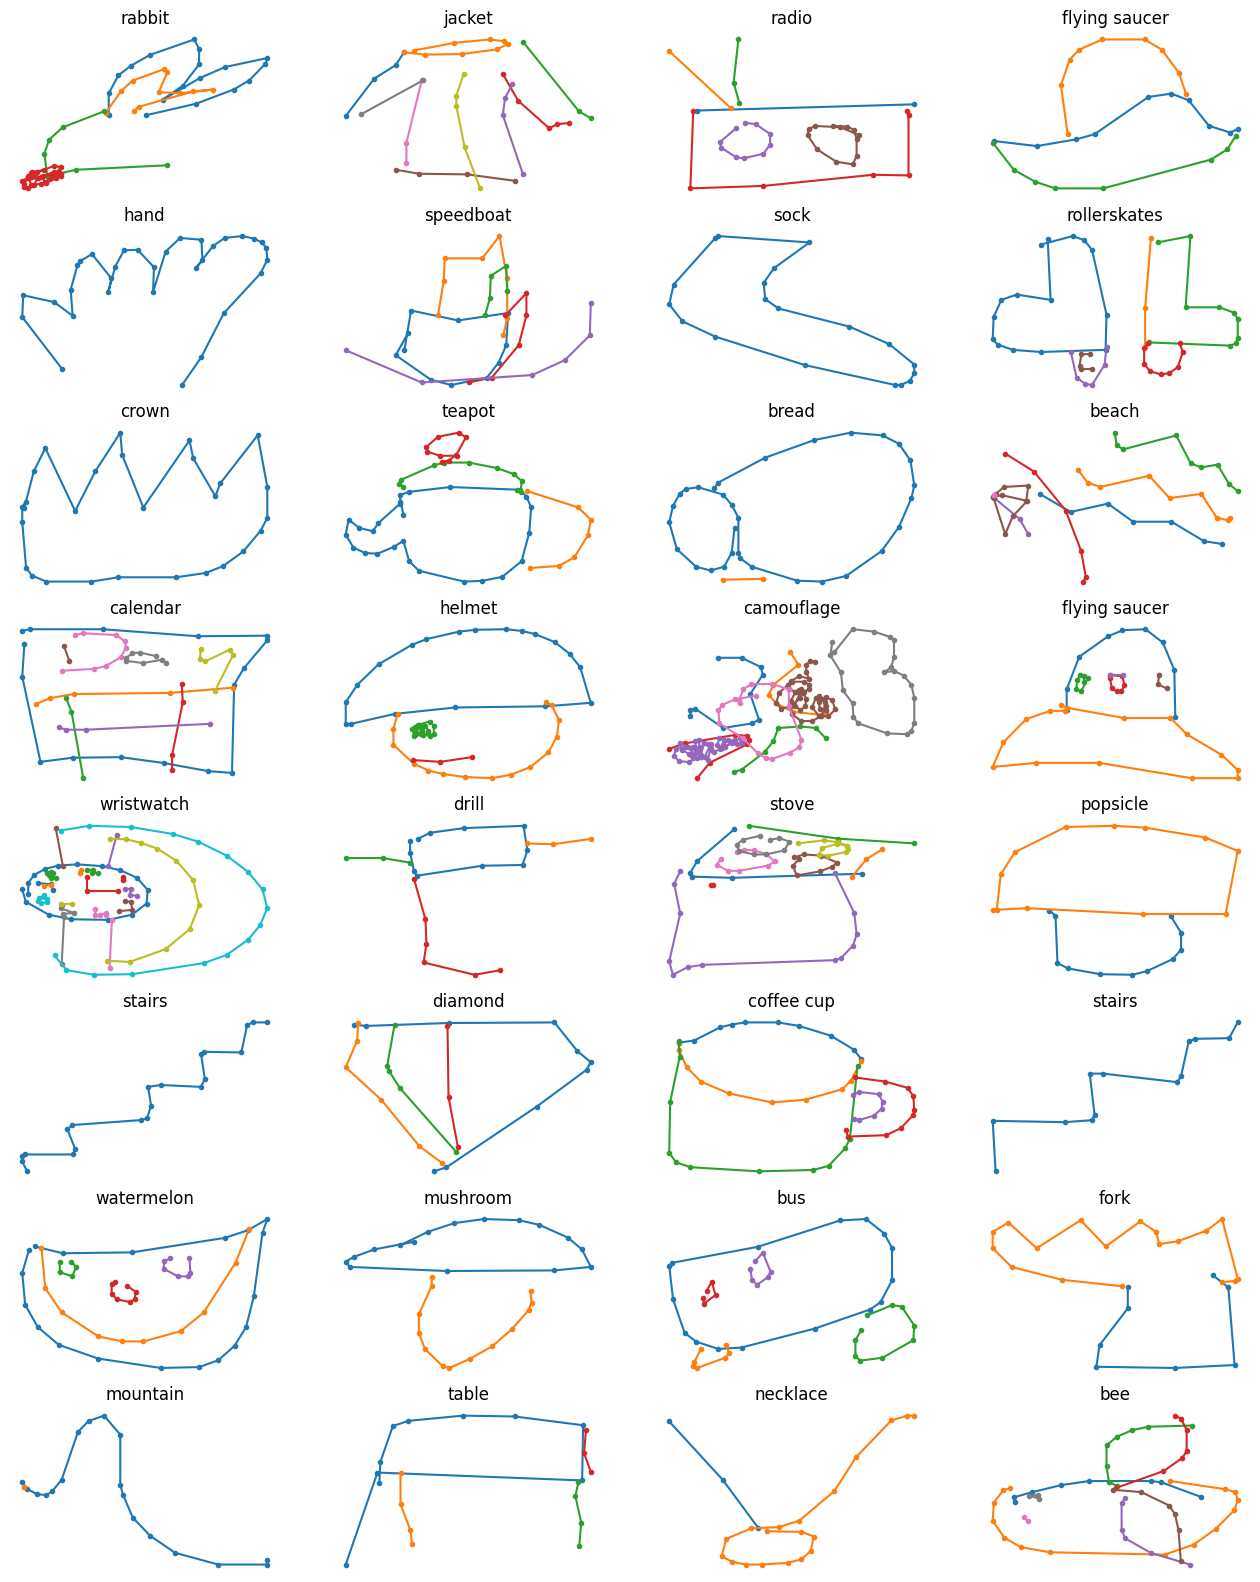

In [23]:
for inks, shapes, labels in train_data.take(1):
    draw_samples(inks.numpy(), len(shapes.numpy()), labels.numpy())

In [24]:
for inks, shapes, labels in train_data.take(1):
    print(shapes)
    for i in range(3):
        print(np.where(inks[i].numpy()[:, 0] != 0.)[0][-1] + 1) #Counting how many non points are in the drawing

tf.Tensor(
[87 35 30 54 16 36 53 31 38 43 80 57 57 44 58 57 49 44 14 17 28 43 19 28
 65 33 42 67 16 36 22 60], shape=(32,), dtype=int64)
87
35
30


In [25]:
shape_list = []
for _, shapes, _ in train_data.take(2000):
    shape_list = np.concatenate([shape_list, shapes.numpy()])

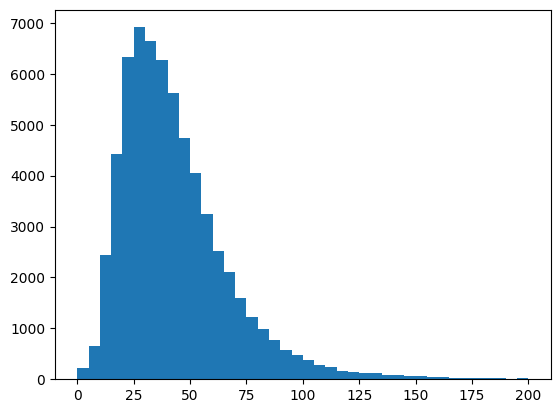

In [26]:
plt.figure()
res = plt.hist(shape_list, bins=40, range=[0, 200])

In [27]:
print(np.shape(res[0]))
print(np.shape(res[1]))

(40,)
(41,)


In [28]:
res

(array([ 227.,  662., 2433., 4424., 6324., 6913., 6647., 6270., 5623.,
        4736., 4055., 3250., 2522., 2104., 1593., 1228.,  997.,  774.,
         577.,  483.,  386.,  284.,  241.,  171.,  143.,  122.,  114.,
          75.,   78.,   74.,   58.,   39.,   39.,   29.,   31.,   22.,
          25.,   22.,   15.,   20.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
        165., 170., 175., 180., 185., 190., 195., 200.]),
 <BarContainer object of 40 artists>)

In [29]:
total = np.sum(res[0])

/tmp/ipykernel_2248/1545618538.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{x}%' for x in plt.gca().get_yticks()])


[Text(0, 0.0, '0.0%'),
 Text(0, 20.0, '20.0%'),
 Text(0, 40.0, '40.0%'),
 Text(0, 60.0, '60.0%'),
 Text(0, 80.0, '80.0%'),
 Text(0, 100.0, '100.0%'),
 Text(0, 120.0, '120.0%')]

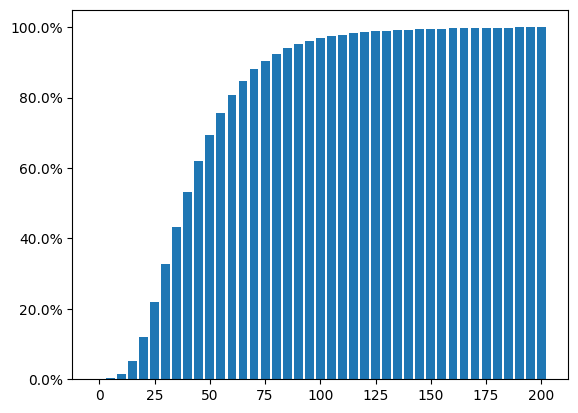

In [30]:
plt.bar(res[1], np.cumsum(np.concatenate([[0], res[0]]))*100/total, width=4)
plt.gca().set_yticklabels([f'{x}%' for x in plt.gca().get_yticks()])

In [31]:
pos = np.where(np.cumsum(np.concatenate([[0], res[0]]))*100/total > 95.)[0][0]
res[1][pos]
percentage = np.cumsum(np.concatenate([[0], res[0]]))*100/total
percentage[pos]

95.22481591728028

**Choosing 95% data. It lowers drawing dimension significantly**

In [43]:
def cropp_data(data, len_to_cropp):
    return data.map(lambda inks, shapes, labels: (inks[:, :len_to_cropp], tf.reshape(labels, [-1, 1])))

In [44]:
cropped_train_data = cropp_data(train_data, int(res[1][pos]))
cropped_eval_data = cropp_data(eval_data, int(res[1][pos]))
cropped_test_data = cropp_data(test_data, int(res[1][pos]))

**Building model**

In [54]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(16, kernel_size=4, strides=2, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(32, kernel_size=5, strides=2, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(64, kernel_size=3, strides=2, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(128, kernel_size=3, strides=2, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(len(train_classes), activation='softmax'))

In [55]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, clipnorm=1.)
model.compile(optimizer=optimizer, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy", "sparse_top_k_categorical_accuracy"])

In [56]:
sample_predict = model.predict(cropped_train_data.take(2))

2/2 [==============================] - 2s 46ms/step


2024-04-25 12:44:31.236256: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10470314127453999339


In [57]:
sample_predict

array([[0.0029023 , 0.0028939 , 0.00289886, ..., 0.00290635, 0.00289307,
        0.00290135],
       [0.00290098, 0.0028965 , 0.002901  , ..., 0.00290177, 0.00289621,
        0.00289824],
       [0.00290357, 0.00289326, 0.00290156, ..., 0.00290488, 0.0028926 ,
        0.0029013 ],
       ...,
       [0.00290399, 0.00289299, 0.00289863, ..., 0.00290767, 0.00289336,
        0.00289772],
       [0.00290373, 0.00289265, 0.00289813, ..., 0.00290956, 0.0028932 ,
        0.00290308],
       [0.00290299, 0.00289322, 0.00290025, ..., 0.00290703, 0.00289546,
        0.00289954]], dtype=float32)

In [58]:
tf.shape(sample_predict)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 64, 345], dtype=int32)>

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, None, 16)          208       
                                                                 
 batch_normalization_4 (Bat  (None, None, 16)          64        
 chNormalization)                                                
                                                                 
 conv1d_13 (Conv1D)          (None, None, 32)          2592      
                                                                 
 batch_normalization_5 (Bat  (None, None, 32)          128       
 chNormalization)                                                
                                                                 
 conv1d_14 (Conv1D)          (None, None, 64)          6208      
                                                                 
 batch_normalization_6 (Bat  (None, None, 64)         

In [60]:
for inks, labels in cropped_train_data.take(1):
    print(inks)
    print(labels)

tf.Tensor(
[[[ 0.10980393 -0.01030928  1.        ]
  [ 0.          0.          0.        ]
  [ 0.00784314  0.04123711  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.03921569  0.43548387  0.        ]
  [-0.02745098  0.15322578  0.        ]
  [ 0.          0.13306451  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.09803922 -0.04000002  0.        ]
  [ 0.12941176 -0.10666662  0.        ]
  [ 0.04313727 -0.30666667  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 ...

 [[-0.07821231  0.          0.        ]
  [-0.03351955  0.01568627  0.        ]
  [-0.07262569  0.05490196  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.   

In [61]:
history = model.fit(cropped_train_data, epochs=2, validation_data=cropped_eval_data)

Epoch 1/2
 107813/Unknown - 3115s 29ms/step - loss: 4.6461 - accuracy: 0.0964 - sparse_top_k_categorical_accuracy: 0.2484

2024-04-25 13:36:27.988336: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13634551435492311168


107813/107813 [==============================] - 3153s 29ms/step - loss: 4.6461 - accuracy: 0.0964 - sparse_top_k_categorical_accuracy: 0.2484 - val_loss: 3.8619 - val_accuracy: 0.1806 - val_sparse_top_k_categorical_accuracy: 0.4221
Epoch 2/2
107813/107813 [==============================] - 3215s 30ms/step - loss: 3.2288 - accuracy: 0.2882 - sparse_top_k_categorical_accuracy: 0.5642 - val_loss: 2.8874 - val_accuracy: 0.3463 - val_sparse_top_k_categorical_accuracy: 0.6329


In [66]:
history.params

{'verbose': 1, 'epochs': 2, 'steps': None}

In [67]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'sparse_top_k_categorical_accuracy', 'val_loss', 'val_accuracy', 'val_sparse_top_k_categorical_accuracy'])


In [68]:
print(history.history.values())

dict_values([[4.646061897277832, 3.2287731170654297], [0.09637043625116348, 0.2882031798362732], [0.24841129779815674, 0.5642423033714294], [3.8618667125701904, 2.887389898300171], [0.18064381182193756, 0.34628230333328247], [0.4221438765525818, 0.6328969597816467]])


In [69]:
y_predicted = model.predict(test_data)

5392/5392 [==============================] - 44s 8ms/step


2024-04-25 17:54:15.999608: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10470314127453999339


In [70]:
y_test_labels = np.concatenate([labels for _, _, labels in test_data])

In [71]:
print(np.mean(tf.keras.metrics.sparse_top_k_categorical_accuracy(y_test_labels, y_predicted)))

0.5404108


1/1 [==============================] - 0s 18ms/step


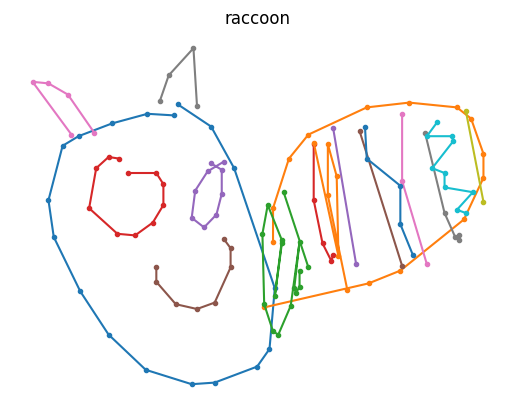

1. raccoon: 15.25%
2. pig: 8.3%
3. tiger: 6.76%
4. cow: 6.03%
5. dog: 5.55%





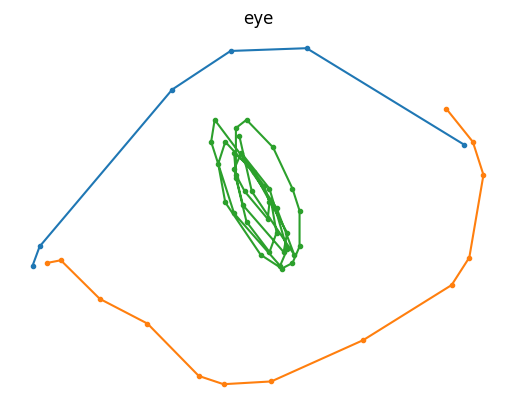

1. toe: 21.91%
2. blueberry: 13.99%
3. garden hose: 7.42%
4. eye: 3.83%
5. hockey puck: 3.44%





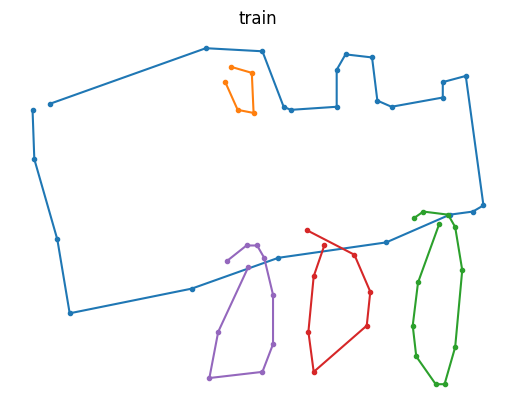

1. motorbike: 10.11%
2. blueberry: 8.8%
3. rain: 8.24%
4. peas: 8.24%
5. animal migration: 5.96%





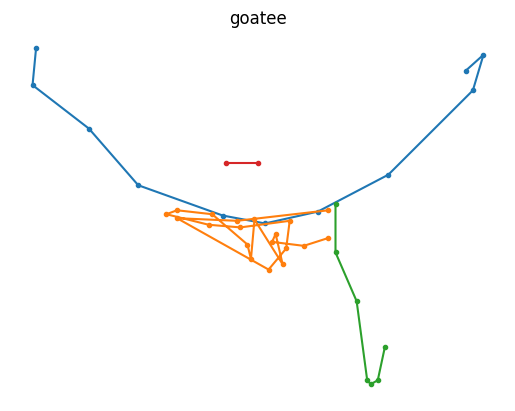

1. necklace: 23.92%
2. stethoscope: 9.25%
3. arm: 6.29%
4. key: 5.03%
5. goatee: 4.81%





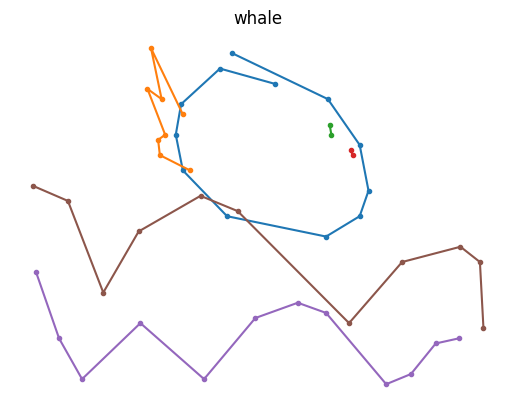

1. teapot: 10.92%
2. animal migration: 6.64%
3. stethoscope: 5.6%
4. carrot: 5.49%
5. bat: 4.49%





In [114]:
n_drawings = 5
test_sample_data = [inks for inks, _, _ in test_data.take(1)][0]
test_predicted = model.predict(test_sample_data)
top_k_predicted = tf.nn.top_k(test_predicted, k=5)
for i in range(n_drawings):
    draw_ink(test_sample_data[i], label=train_classes[y_test_labels[i]])
    top_k = top_k_predicted[0].numpy()
    top_k_classes = top_k_predicted[1].numpy()
    for j in range(5):
        plt.show()
        print(f"{j + 1}. {train_classes[int(top_k_classes[i][j])]}: {str(np.round(top_k[i][j]*100, 2))}%")
    print("\n\n")